In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [2]:
df=pd.read_csv('sentences.csv', delimiter='\t', header=None, names=["1","language","Text"] )
del df["1"]
df = df[['Text', 'language']]
df

,Text,language
0,我們試試看！,cmn
1,我该去睡觉了。,cmn
2,你在干什麼啊？,cmn
3,這是什麼啊？,cmn
4,今天是６月１８号，也是Muiriel的生日！,cmn
...,...,...
11163388,Yesteqsa-yi-d uselmad amaynut amek isem-iw u n...,kab
11163389,On ne sait pas ce que demain nous apportera.,fra
11163390,Лейла была любящей матерью.,rus
11163391,「スミスさんをお願いしたいのですが」「少々お待ちください」,jpn


In [3]:
att=['ben','eng','guj','hin','kan','mal','mar','nep','ori','pan','san','tam','urd']
dataset= df.loc[df['language'].isin(att)]

dataset = dataset.drop(dataset.query('language == "eng"').sample(frac=.99).index)
dataset = dataset.drop(dataset.query('language == "mar"').sample(frac=.90).index)
dataset = dataset.drop(dataset.query('language == "hin"').sample(frac=.90).index)

dataset['language'].unique()


array(['eng', 'urd', 'san', 'hin', 'ben', 'mal', 'mar', 'guj', 'pan',
       'tam', 'kan', 'ori'], dtype=object)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


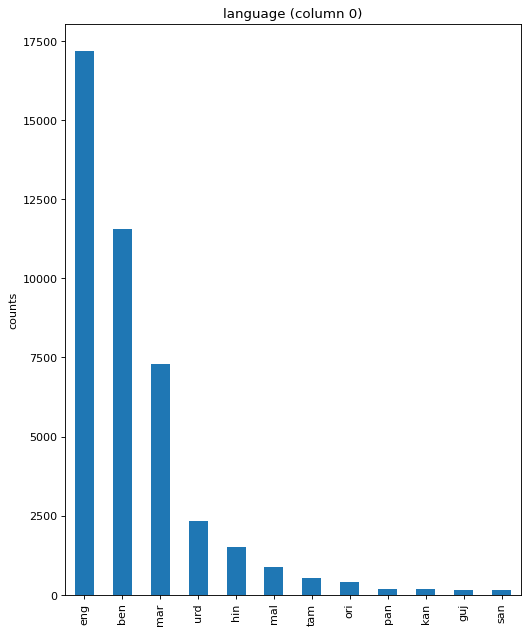

In [5]:
plotPerColumnDistribution(dataset, 10, 5)


In [6]:
from sklearn.model_selection         import train_test_split
text = dataset.Text
language = dataset.language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))


lenght of training data =  33899
lenght of test data =  8475


In [7]:
from sklearn.feature_extraction.text import*
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder


In [8]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)

#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)


In [9]:
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()


In [10]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)


In [11]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);


In [12]:
rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);


In [13]:
rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

In [14]:
rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

In [15]:
rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

In [16]:
rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

In [17]:
rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

In [18]:
rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

In [19]:
rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

In [20]:
rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

In [21]:
rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

In [22]:
from sklearn.svm                     import LinearSVC
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);


In [23]:
from sklearn.linear_model            import LogisticRegression
#apply LogisticRegression() on train dataset
lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);


In [24]:
#TESTING

uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)

bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)



In [25]:
#RANDOM FOREST CLASSIFIFIER
from sklearn.metrics import accuracy_score

predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

predictions_char5_rfc = rfc_char5.predict(char5_test_features)         #prediction
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)           #accuracy

predictions_char6_rfc = rfc_char6.predict(char6_test_features)         #prediction
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)           #accuracy

predictions_char7_rfc = rfc_char7.predict(char7_test_features)         #prediction
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)           #accuracy

predictions_char8_rfc = rfc_char8.predict(char8_test_features)         #prediction
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)           #accuracy

predictions_char9_rfc = rfc_char9.predict(char9_test_features)         #prediction
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)           #accuracy

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         #prediction
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)           #accuracy


In [26]:
#LINEAR SVC

predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)         #prediction
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)           #accuracy

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)         #prediction
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)           #accuracy

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)         #prediction
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)           #accuracy

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         #prediction
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)           #accuracy

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)         #prediction
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)           #accuracy

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)         #prediction
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)           #accuracy


In [27]:
#LOGISTIC REGRESSION

predictions_uni_lr = lr_uni.predict(uni_test_features)         #prediction
uni_lr = accuracy_score(test_labels, predictions_uni_lr)           #accuracy

predictions_bi_lr = lr_bi.predict(bi_test_features)         #prediction
bi_lr = accuracy_score(test_labels, predictions_bi_lr)           #accuracy

predictions_tri_lr = lr_tri.predict(tri_test_features)         #prediction
tri_lr = accuracy_score(test_labels, predictions_tri_lr)           #accuracy

predictions_char3_lr = lr_char3.predict(char3_test_features)         #prediction
char3_lr = accuracy_score(test_labels, predictions_char3_lr)           #accuracy

predictions_char4_lr = lr_char4.predict(char4_test_features)         #prediction
char4_lr = accuracy_score(test_labels, predictions_char4_lr)           #accuracy

predictions_char5_lr = lr_char5.predict(char5_test_features)         #prediction
char5_lr = accuracy_score(test_labels, predictions_char5_lr)           #accuracy

predictions_char6_lr = lr_char6.predict(char6_test_features)         #prediction
char6_lr = accuracy_score(test_labels, predictions_char6_lr)           #accuracy

predictions_char7_lr = lr_char7.predict(char7_test_features)         #prediction
char7_lr = accuracy_score(test_labels, predictions_char7_lr)           #accuracy

predictions_char8_lr = lr_char8.predict(char8_test_features)         #prediction
char8_lr = accuracy_score(test_labels, predictions_char8_lr)           #accuracy

predictions_char9_lr = lr_char9.predict(char9_test_features)         #prediction
char9_lr = accuracy_score(test_labels, predictions_char9_lr)           #accuracy

predictions_char10_lr = lr_char10.predict(char10_test_features)         #prediction
char10_lr = accuracy_score(test_labels, predictions_char10_lr)           #accuracy


In [28]:
features = uni_vector.transform(dataset.Text)
target=language
#apply random forest on train dataset
model=lr_uni.fit(features, target);

In [42]:
comment = 'କେମିତି ଅଛନ୍ତି, କେମିତି ଅଛ?' 
comment = 'नई भाषाएँ जोड़ी गई हैं, जिनमें असमिया, भोजपुरी, डोगरी, कोंकणी, मैथिली'
#comment = 'ஹலோ எப்படி இருக்கிறீர்கள்?'
#comment = 'શુ કરો છો? હુ મજામા છુ' 
comment = 'હું હમણાં મારા પ્રોજેક્ટ સમીક્ષા આપી રહ્યો છુંસમીક્ષા આપી રહ્યો છુંસમીક્ષા આપી રહ્યો છુંસમીક્ષા આપી રહ્યો છું  समिया, भोजपुरी, डोगरी, कोंकणी, मैथिली'

user_input= uni_vector.transform([comment])
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)
language = model.predict(user_input)  
a=[ language[i] for i in [0] ]
print("Language : ",a)

Language :  ['guj']
